In [2]:
import torch 
import pandas as pd
import sys
sys.path.append("../")

In [3]:
from utils.logdata_handler import parse_log_file

In [4]:
df1, meta1 = parse_log_file("/Users/keisuke/Documents/projects/todo/worms/job/FF1D/seed_1_orth.log")
df2, meta2 = parse_log_file("/Users/keisuke/Documents/projects/todo/worms/job/FF1D/seed_1_uni.log")

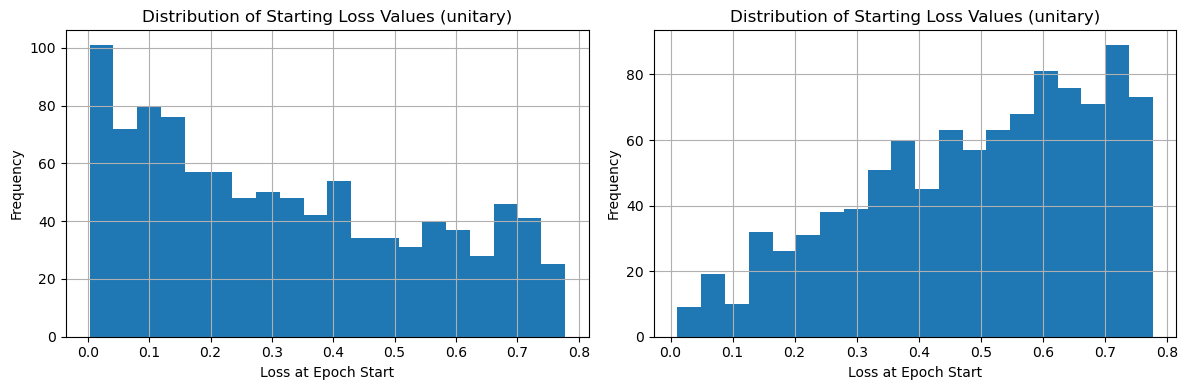

In [5]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df1['Loss at Epoch Start'].hist(bins=20, ax=ax1)
ax1.set_xlabel('Loss at Epoch Start')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Starting Loss Values (unitary)')

df2['Loss at Epoch Start'].hist(bins=20, ax=ax2)
ax2.set_xlabel('Loss at Epoch Start')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Starting Loss Values (unitary)')

plt.tight_layout()
plt.show()


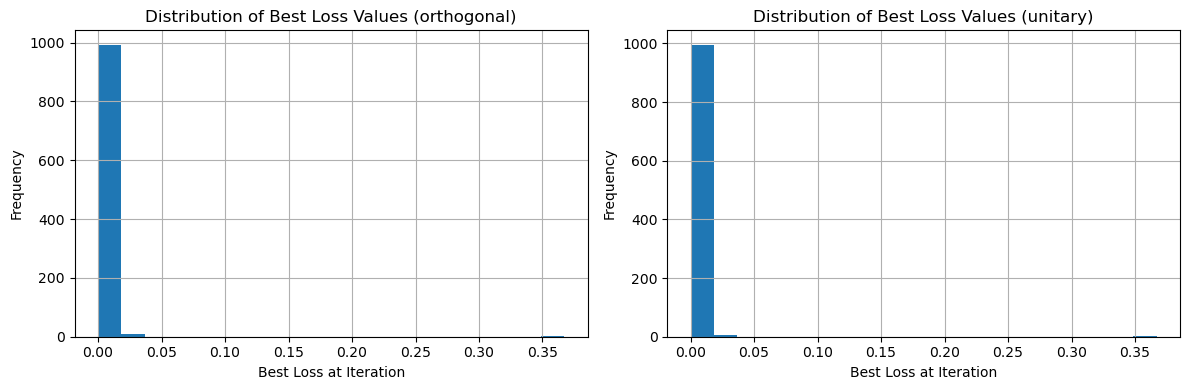

In [6]:

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df1['Best Loss at Iteration'].hist(bins=20, ax=ax1)
ax1.set_xlabel('Best Loss at Iteration')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Best Loss Values (orthogonal)')

df2['Best Loss at Iteration'].hist(bins=20, ax=ax2)
ax2.set_xlabel('Best Loss at Iteration')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Best Loss Values (unitary)')

plt.tight_layout()
plt.show()


In [7]:
df1["Best Loss at Iteration"].min(), df2["Best Loss at Iteration"].min()


(1.9231480989923e-06, 4.8881911089981855e-06)

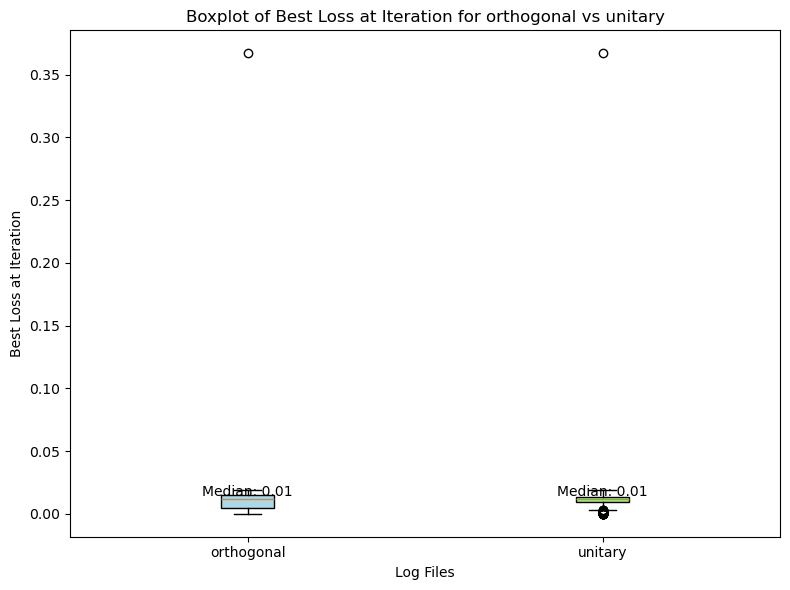

In [8]:
import matplotlib.pyplot as plt
import numpy as np 

fig, ax = plt.subplots(figsize=(8, 6))

combined_data = [df1['Best Loss at Iteration'], df2['Best Loss at Iteration']]
box = ax.boxplot(combined_data, labels=['orthogonal', 'unitary'], patch_artist=True)

# Adding colors to box plots
colors = ['lightblue', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adding explanation of the box plot
for i, data in enumerate(combined_data, start=1):
    median = np.median(data)
    ax.text(i, median, f'Median: {median:.2f}', horizontalalignment='center', verticalalignment='bottom', color='black')

ax.set_xlabel('Log Files')
ax.set_ylabel('Best Loss at Iteration')
ax.set_title('Boxplot of Best Loss at Iteration for orthogonal vs unitary')

plt.tight_layout()
plt.show()
